# Load Data - Select picked Z
pick_Z_Tr1 = 7940
pick_Z_Tr2 = 11388
pick_notZ_ = 0?

In [2]:
from obspy import read
import os
# data_st.write(file, format="SAC")

#Tr1_pd = "/home/silvia/Desktop/Data/DETECT/Tr_1_picked_Z"
Tr2_pd = "/home/silvia/Desktop/Data/DETECT/Tr_2_picked_Z"

#Tr1 = "/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/Tracce_First_part_new"
Tr2 = "/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/Tracce_Second_part_new"

Tr_f = os.listdir(Tr2)
Tr_f.sort()
pick_tot = 0
# pick_Z = 0
for it0 in Tr_f: # it0 tipical = "211205015137"
    for it1 in os.scandir(f"{Tr2}/{it0}"):         # it1 typical = /home/silvia/Desktop/Data/DETECT/transfer_14589_files_1470713b/Traces_2/211214033749/S0101.CHZ.sac
        if it1.path[-5] == "Z":
            b = read(it1.path)
            if "a" in b[0].stats.sac:
                b.write(f"{Tr2_pd}/{it1.path.split('/')[-2]}.{it1.path.split('/')[-1]}",format="SAC")
                pick_tot += 1
            #print(it1.path)


In [24]:
from obspy import read
import os
import pandas as pd
# data_st.write(file, format="SAC")

Tr1 = "/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/Tracce_First_part_new"
Tr2 = "/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/Tracce_Second_part_new"

Tr_f1 = os.listdir(Tr1)
for i in range(len(Tr_f1)):
    Tr_f1[i] = Tr1+"/"+Tr_f1[i]

Tr_f2 = os.listdir(Tr2)
for i in range(len(Tr_f2)):
    Tr_f2[i] = Tr2+"/"+Tr_f2[i]

Tr_f = Tr_f1+Tr_f2
Tr_f.sort()


for it0 in Tr_f[0:1]: # it0 tipical = "/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/Tracce_First_part_new/211205015137"
        b = read(f"{it0}/*Z.sac")

        # if it1.path[-5] == "Z":
        #     b = read(it1.path)



In [25]:
meta = pd.read_csv("/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/catalog_with_ID_abs_locations.txt")

meta_tr = meta[meta["ID"] == int(name.split(".")[0])]

trace_name = []
source_latitude_deg = []
source_longitude_deg = []
source_depth = []
source_origin_time = []
station_code = []
station_channels = []
trace_start_time = []
trace_P_arrival_sample = []
source_magnitude = []
source_magnitude_type = []
sampling_rate = []
trace_name.append(name[:-4])

source_latitude_deg.append(meta_tr["LAT"].iloc[0])
source_longitude_deg.append(meta_tr["LON"].iloc[0])
source_depth.append(meta_tr["DEP"].iloc[0])
source_origin_time.append(meta_tr["TIME"].iloc[0])

station_code.append(b[0].stats.station)
station_channels.append(b[0].stats.channel)
trace_start_time.append(b[0].stats.starttime)
trace_P_arrival_sample.append(int(b[0].stats.sac.a * b[0].stats.sampling_rate))

source_magnitude.append(meta_tr["ML"].iloc[0])

source_magnitude_type.append("ML")
sampling_rate.append(b[0].stats.sampling_rate)
x2[i] = b[0].data[trace_P_arrival_sample[-1]-400: trace_P_arrival_sample[-1]+400]


dizio2 = {"trace_name":trace_name,"source_latitude_deg": source_latitude_deg, "source_longitude_deg":source_longitude_deg, "source_depth":source_depth,
        "source_origin_time":source_origin_time,"station_code":station_code, "station_channels": station_channels, "trace_start_time": trace_start_time,
        "trace_P_arrival_sample":trace_P_arrival_sample, "source_magnitude":source_magnitude,"source_magnitude_type":source_magnitude_type,"sampling_rate":sampling_rate}
dizio2["centrato"] = [True for i in range(len(x2))]
dizio2["demeaned"] = [False for i in range(len(x2))]
dizio2["normalized"] = [False for i in range(len(x2))]


66 Trace(s) in Stream:

ZK.S0110..CHZ | 2021-09-01T01:20:48.000000Z - 2021-09-01T01:21:48.000000Z | 200.0 Hz, 12001 samples
...
(64 other traces)
...
ZK.S1016..DHZ | 2021-09-01T01:20:48.000000Z - 2021-09-01T01:21:48.000000Z | 200.0 Hz, 12001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [39]:
len(b[0].data)
import _Library_HOS
sig = _Library_HOS.freq_filter(b[0].data, 200, 5, type_filter= "highpass")
onset_1, diff, onset_2 = _Library_HOS.get_onset(sig, 100, threshold=0.1, statistics= _Library_HOS.S_6)
print(onset_1, onset_2)

111 10280


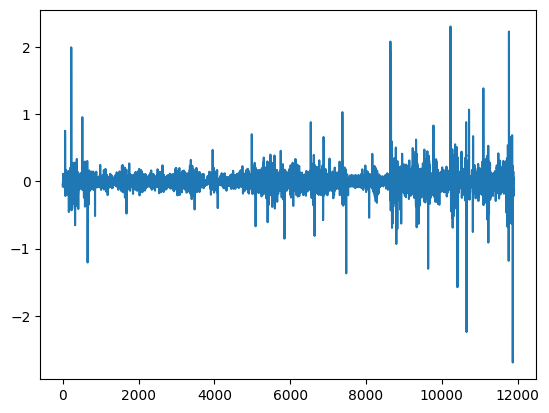

In [41]:
import matplotlib.pyplot as plt
plt.plot(diff)

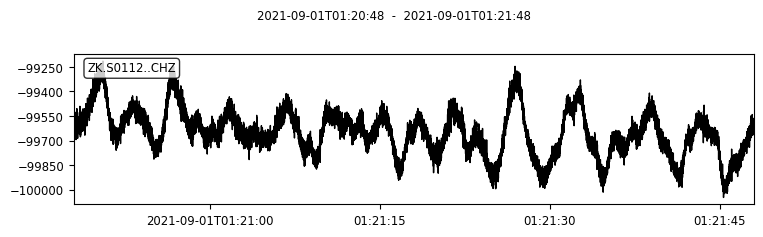

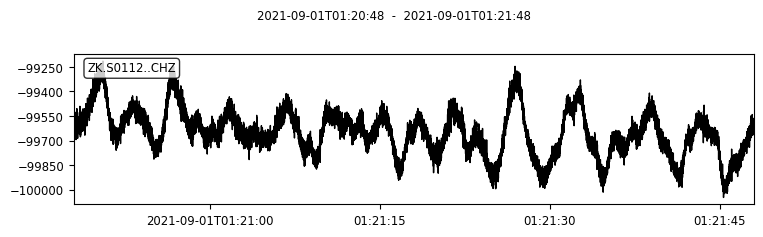

In [44]:
b[1].plot()

In [42]:
len(b[0].data)

12001

In [43]:
for j in range(len(b)):
    if "a" in b[j].stats.sac:
        print(j)

1
3
9
16
17
23
25
50
57
60
63


In [57]:
b[9].stats.sac.a


32.28

In [55]:
32.16*200

6431.999999999999

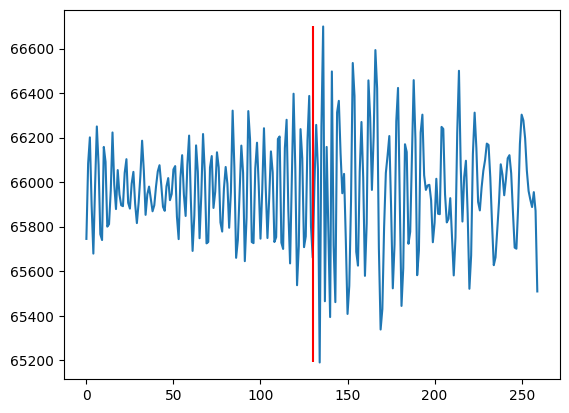

In [62]:

import numpy as np
i = 16
plt.plot(b[i].data[int(b[i].stats.sac.a*200)-130:int(b[i].stats.sac.a*200)+130])
plt.vlines(130,np.min(b[i].data[int(b[i].stats.sac.a*200)-130:int(b[i].stats.sac.a*200)+130]),np.max(b[i].data[int(b[i].stats.sac.a*200)-130:int(b[i].stats.sac.a*200)+130]),color="red")

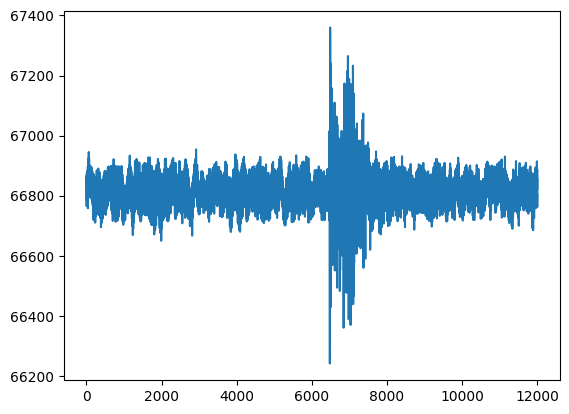

In [65]:
plt.plot(b[9].data)

# Create custom Dataset

In [1]:
from obspy import read
import os
import pandas as pd
import numpy as np
meta = pd.read_csv("/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/catalog_with_ID_abs_locations.txt")

Xcorso = "/home/silvia/Desktop/Data/DETECT/Tr_2_picked_Z"
Tr_l = os.listdir(Xcorso)
Tr_l.sort()
trace_name = []
source_latitude_deg = []
source_longitude_deg = []
source_depth = []
source_origin_time = []
station_code = []
station_channels = []
trace_start_time = []
trace_P_arrival_sample = []
source_magnitude = []
source_magnitude_type = []
sampling_rate = []

x2 = np.zeros((len(Tr_l),800))
for i,name in enumerate(Tr_l):
    b = read(f"{Xcorso}/{name}")
    meta_tr = meta[meta["ID"] == int(name.split(".")[0])]

    trace_name.append(name[:-4])

    source_latitude_deg.append(meta_tr["LAT"].iloc[0])
    source_longitude_deg.append(meta_tr["LON"].iloc[0])
    source_depth.append(meta_tr["DEP"].iloc[0])
    source_origin_time.append(meta_tr["TIME"].iloc[0])

    station_code.append(b[0].stats.station)
    station_channels.append(b[0].stats.channel)
    trace_start_time.append(b[0].stats.starttime)
    trace_P_arrival_sample.append(int(b[0].stats.sac.a * b[0].stats.sampling_rate))

    source_magnitude.append(meta_tr["ML"].iloc[0])
    
    source_magnitude_type.append("ML")
    sampling_rate.append(b[0].stats.sampling_rate)
    x2[i] = b[0].data[trace_P_arrival_sample[-1]-400: trace_P_arrival_sample[-1]+400]


dizio2 = {"trace_name":trace_name,"source_latitude_deg": source_latitude_deg, "source_longitude_deg":source_longitude_deg, "source_depth":source_depth,
          "source_origin_time":source_origin_time,"station_code":station_code, "station_channels": station_channels, "trace_start_time": trace_start_time,
          "trace_P_arrival_sample":trace_P_arrival_sample, "source_magnitude":source_magnitude,"source_magnitude_type":source_magnitude_type,"sampling_rate":sampling_rate}
dizio2["centrato"] = [True for i in range(len(x2))]
dizio2["demeaned"] = [False for i in range(len(x2))]
dizio2["normalized"] = [False for i in range(len(x2))]

In [5]:
len(dizio2["trace_name"])

11379

In [6]:
from obspy import read
import os
import pandas as pd
import numpy as np
meta = pd.read_csv("/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/catalog_with_ID_abs_locations.txt")

Xcorso = "/home/silvia/Desktop/Data/DETECT/Tr_1_picked_Z"
Tr_l = os.listdir(Xcorso)
Tr_l.sort()
trace_name = []
source_latitude_deg = []
source_longitude_deg = []
source_depth = []
source_origin_time = []
station_code = []
station_channels = []
trace_start_time = []
trace_P_arrival_sample = []
source_magnitude = []
source_magnitude_type = []
sampling_rate = []

x1 = np.zeros((len(Tr_l),800))
for i,name in enumerate(Tr_l):
    b = read(f"{Xcorso}/{name}")
    meta_tr = meta[meta["ID"] == int(name.split(".")[0])]

    trace_name.append(name[:-4])

    source_latitude_deg.append(meta_tr["LAT"].iloc[0])
    source_longitude_deg.append(meta_tr["LON"].iloc[0])
    source_depth.append(meta_tr["DEP"].iloc[0])
    source_origin_time.append(meta_tr["TIME"].iloc[0])

    station_code.append(b[0].stats.station)
    station_channels.append(b[0].stats.channel)
    trace_start_time.append(b[0].stats.starttime)
    trace_P_arrival_sample.append(int(b[0].stats.sac.a * b[0].stats.sampling_rate))

    source_magnitude.append(meta_tr["ML"].iloc[0])
    
    source_magnitude_type.append("ML")
    sampling_rate.append(b[0].stats.sampling_rate)
    x1[i] = b[0].data[trace_P_arrival_sample[-1]-400: trace_P_arrival_sample[-1]+400]


dizio1 = {"trace_name":trace_name,"source_latitude_deg": source_latitude_deg, "source_longitude_deg":source_longitude_deg, "source_depth":source_depth,
          "source_origin_time":source_origin_time,"station_code":station_code, "station_channels": station_channels, "trace_start_time": trace_start_time,
          "trace_P_arrival_sample":trace_P_arrival_sample, "source_magnitude":source_magnitude,"source_magnitude_type":source_magnitude_type,"sampling_rate":sampling_rate}
dizio1["centrato"] = [True for i in range(len(x1))]
dizio1["demeaned"] = [False for i in range(len(x1))]
dizio1["normalized"] = [False for i in range(len(x1))]

In [7]:
dizio_tot = {}
for key in dizio1:
    dizio_tot[key] = dizio1[key]+dizio2[key]
xtot = np.concatenate((x1, x2), axis = 0) 

ids = []
for i in dizio_tot["trace_name"]:
    ids.append(i.split(".")[0])
dizio_tot["source_id"] = ids

In [16]:
xtot.shape

(22776, 800)

In [17]:
from Classe_sismogramma_v3 import ClasseDataset
D = ClasseDataset()
D.sismogramma = xtot
D.metadata = dizio_tot
hd = "/home/silvia/Desktop/Data/DETECT/data_Tr1+Tr2_picked2.hdf5"
cs = "/home/silvia/Desktop/Data/DETECT/metadata_Tr1+Tr2_picked2.csv"
D.centrato = True
D.crea_custom_dataset(hd,cs)

sto creando hdf5
ho creato hdf5


 PANDAS HA AGITO 0.5883748779306188


In [2]:
from Classe_sismogramma_v3 import ClasseDataset
D = ClasseDataset()

hd = "/home/silvia/Desktop/Data/DETECT/data_Tr1+Tr2_picked.hdf5"
cs = "/home/silvia/Desktop/Data/DETECT/metadata_Tr1+Tr2_picked.csv"

D.leggi_custom_dataset(hd,cs)

# Ricava eventi picked - Plot delle stesse.
Da modificare

In [7]:
# Ricavo eventi picked
import matplotlib.pyplot as plt
from Classe_sismogramma_v3 import ClasseDataset
import pandas as pd

D = ClasseDataset()
hd = "/home/silvia/Desktop/Data/DETECT/data_Tr1+Tr2_picked.hdf5"
cs = "/home/silvia/Desktop/Data/DETECT/metadata_Tr1+Tr2_picked.csv"
D.leggi_custom_dataset(hd,cs)

a = pd.DataFrame.from_dict(D.metadata)

list_source = []
list_lat = []
list_lon = []
list_dep = []
list_mag = []
list_num_P_picked = []

for i in a.source_id:
    if not(i in list_source):
        list_source.append(i)

for k in list_source: 
    aa = a[a["source_id"]==k]
    list_lat.append(aa["source_latitude_deg"].iloc[0])    
    list_lon.append(aa["source_longitude_deg"].iloc[0])    
    list_dep.append(aa["source_depth"].iloc[0])
    list_mag.append(aa["source_magnitude"].iloc[0])
    list_num_P_picked.append(len(aa))

map_events_picked = pd.DataFrame.from_dict({"source_id": list_source,"source_latitude_deg":list_lat, "source_longitude_deg": list_lon, "source_depth": list_dep, 
                                     "source_magnitude":list_mag, "number_P_picks": list_num_P_picked})
map_events_picked.to_csv("/home/silvia/Desktop/Data/DETECT/Map_events_Picks.csv", index=False)


In [8]:
# plot picked in base a magnitudo e num. pick
"""
DA FARE:    metti depth in "negativo"
            cambia da lat,lon -> x,y nello spazio "reale"
"""
import pandas as pd
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
import math

map_events_picked = pd.read_csv("/home/silvia/Desktop/Data/DETECT/Map_events_Picks.csv")
colorscale_custom = [
    [0.0, 'red'],           # a 0 rossi
    [0.042, 'red'],         # tra 1 e 6 rossi
    [0.069, 'blue'],        # Valori tra 7 e 10 saranno rosso-blu
    [0.14, 'green'],        # Valori tra 10 e 20 saranno blu-verdi
    [1.0, 'green'],         # Valori superiori a 20 saranno verdi
]

sizes = []
for i in map_events_picked["source_magnitude"]:
    if not math.isnan(i):
        sizes.append(i*2.0+4.5)
    else:
        sizes.append(1.5)

df = map_events_picked[["source_latitude_deg","source_longitude_deg", "source_depth"]]


# Create an interactive 3D scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=df['source_latitude_deg'],
    y=df['source_longitude_deg'],
    z=df['source_depth'],
    mode='markers',
    marker=dict(
        size=sizes,
        opacity=0.7,
        color=map_events_picked["number_P_picks"],
        colorscale=colorscale_custom,  # Usa la colormap personalizzata
        colorbar=dict(title='Color Scale', tickvals=[7, 10, 20], ticktext=['7<: Red','10 Blue', '>20: green']),  # Aggiungi la colorbar personalizzata
    ),
    name='Picked'
))

fig.update_layout(
    scene=dict(
        xaxis_title='Latitude',
        yaxis_title='Longitude',
        zaxis_title='Depth'
    ),
    title='Mappa eventi in base a numero di tracce con pick'
)

# Save the plot to an HTML file
fig.write_html("/home/silvia/Desktop/Plot_qualcosa.html")

<AxesSubplot:>

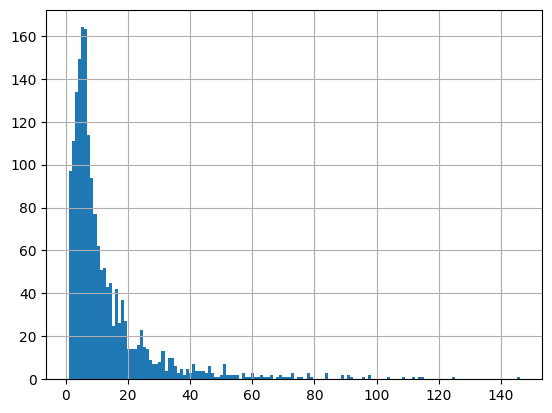

In [9]:
map_events_picked["number_P_picks"].hist(bins=146)

# Verify events in catalogue are in T1 or T2 folders

In [12]:
# Ho trovato 19.328 pick dalle tracce e 22.000 dal catalogo. catalogo ha più eventi, se considero quelli
# comuni ho 19.330 pick (ok)
import os
import pandas as pd
meta = pd.read_csv("/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/catalog_with_ID_abs_locations.txt")
Tr1 = "/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/Tracce_First_part_new"
Tr2 = "/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/Tracce_Second_part_new"
Tr1_f = os.listdir(Tr1)
Tr2_f = os.listdir(Tr2)
len(Tr1_f)+ len(Tr2_f)

ID_list = list(meta["ID"])
T_tot = Tr1_f + Tr2_f

for ti in T_tot:
    if int(ti) in ID_list:
        4                       # verifico se perogni evento in tracce sac, è anche in catalogo. Si
    else:
        print("No OK")

pat = "/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/picks/P_pick_merged.txt"
picks = pd.read_csv(pat)
# Seleziono eventi catalogo che sono anche in tracce sac (indici di pd.dataframe picks)
cat_sac_indx = [ False for i in range(len(meta["ID"]))]
for name in T_tot:
    ix = meta[meta["ID"] == int(name)].index
    cat_sac_indx[ix[0]] = True

# Seleziono tutti e soli i pick del catalogo che sono anche in Tracce sac
picks_common = picks[cat_sac_indx]


picks_common = (picks_common != "NaT")
picks_common = picks_common + 0.0
picks_common.sum().sum()

22779.0

# Downsampling

In [1]:

from Classe_sismogramma_v3 import ClasseDataset
import numpy as np
import scipy

hd = "/home/silvia/Desktop/Data/DETECT/data_Tr1+Tr2_picked.hdf5"
cs = "/home/silvia/Desktop/Data/DETECT/metadata_Tr1+Tr2_picked.csv"

D = ClasseDataset()
D.leggi_custom_dataset(hd,cs)

D_downsampled = ClasseDataset()
D_downsampled.leggi_custom_dataset(hd,cs)


In [2]:
D_downsampled.sismogramma = scipy.signal.decimate(D_downsampled.sismogramma, 2)

In [3]:
D.demean()
D_downsampled.demean()

In [4]:
D.normalizza()
D_downsampled.normalizza()

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [5]:
hdf1 = "/home/silvia/Desktop/Data/DETECT/Detect_data_picked_normalized_downsampled.hdf5"
csv1 = "/home/silvia/Desktop/Data/DETECT/Detect_metadata_picked_normalized_downsampled.csv"

#D_downsampled.crea_custom_dataset(hdf1,csv1)


sto creando hdf5
ho creato hdf5


 PANDAS HA AGITO 0.3362800700124353


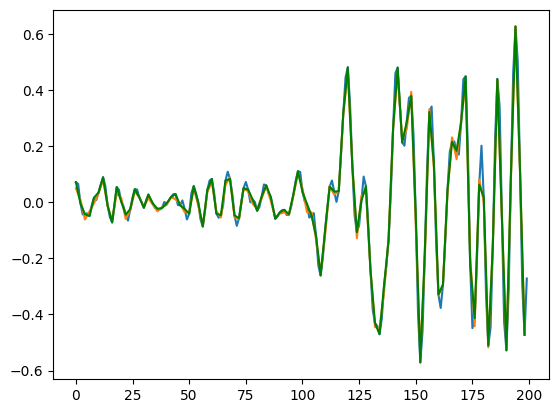

In [13]:
import matplotlib.pyplot as plt
a = 24
#a=68
plt.plot(D.sismogramma[a][300:500])
plt.plot([2*i for i in range(100)], D_downsampled.sismogramma[a][150:250])
plt.plot([2*i for i in range(100)], D.sismogramma[a,::2][150:250], color="green")

# Read quality Pick

In [1]:
import pandas as pd
patqp = "/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/picks/P_weight_merged.txt"
patcat = "/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/catalog_with_ID_abs_locations.txt"
qual_pick = pd.read_csv(patqp)
catalog = pd.read_csv(patcat)
meta_pred_16 = pd.read_csv ("/home/silvia/Desktop/Data/DETECT/metadata_Tr1+Tr2_picked.csv")


In [14]:
catalog.iloc[0:2]

,ID,TIME,LAT,LON,DEP,ML,RMS,ERR_H,ERR_Z
0,210901012118,2021-09-01 01:21:18,40.6570,15.4242,5.0,-0.98,0.93,0.4,0.3
1,210901020904,2021-09-01 02:09:04,40.7138,15.3785,2.2,-0.20,0.10,1.3,1.1


In [15]:
qual_pick.iloc[0:2]

,S0101,S0201,S0301,S0401,S0501,S0601,S0701,S0801,S0901,S1001,...,S0120,S0220,S0320,S0420,S0520,S0620,S0720,S0820,S0920,S1020
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
meta_pred_16.iloc[0:3]

,trace_name,source_latitude_deg,source_longitude_deg,source_depth,source_origin_time,station_code,station_channels,trace_start_time,trace_P_arrival_sample,source_magnitude,source_magnitude_type,sampling_rate,centrato,demeaned,normalized,source_id
0,210901012118.S0112.CHZ,40.657,15.4242,5.0,2021-09-01 01:21:18,S0112,CHZ,2021-09-01T01:20:48.000000Z,6550,-0.98,ML,200.0,True,False,False,210901012118
1,210901012118.S0114.CHZ,40.657,15.4242,5.0,2021-09-01 01:21:18,S0114,CHZ,2021-09-01T01:20:48.000000Z,6431,-0.98,ML,200.0,True,False,False,210901012118
2,210901012118.S0213.CHZ,40.657,15.4242,5.0,2021-09-01 01:21:18,S0213,CHZ,2021-09-01T01:20:48.000000Z,6455,-0.98,ML,200.0,True,False,False,210901012118


In [7]:
ID = meta_pred_16["trace_name"][0].split(".")[0]
ID

ind = catalog[catalog["ID"] == int(ID)].index[0]
ind

qual_pick.iloc[ind][meta_pred_16["trace_name"][0].split(".")[1]]
ind

,ID,TIME,LAT,LON,DEP,ML,RMS,ERR_H,ERR_Z
0,210901012118,2021-09-01 01:21:18,40.657,15.4242,5.0,-0.98,0.93,0.4,0.3


In [8]:
qualities = []
for name in meta_pred_16["trace_name"]:
    ID = name.split(".")[0]
    ind = catalog[catalog["ID"] == int(ID)].index[0]
    quality = qual_pick.iloc[ind][name.split(".")[1]]
    qualities.append(int(quality))
meta_pred_16["Pick_quality"] = qualities

In [9]:
meta_pred_16.to_csv("/home/silvia/Desktop/Data/DETECT/metadata_Tr1+Tr2_picked.csv", index=False)

In [10]:
meta_pred_16 = pd.read_csv ("/home/silvia/Desktop/Data/DETECT/metadata_Tr1+Tr2_picked.csv")
meta_pred_16


,trace_name,source_latitude_deg,source_longitude_deg,source_depth,source_origin_time,station_code,station_channels,trace_start_time,trace_P_arrival_sample,source_magnitude,source_magnitude_type,sampling_rate,centrato,demeaned,normalized,source_id,Pick_quality
0,210901012118.S0112.CHZ,40.6570,15.4242,5.0,2021-09-01 01:21:18,S0112,CHZ,2021-09-01T01:20:48.000000Z,6550,-0.98,ML,200.0,True,False,False,210901012118,0
1,210901012118.S0114.CHZ,40.6570,15.4242,5.0,2021-09-01 01:21:18,S0114,CHZ,2021-09-01T01:20:48.000000Z,6431,-0.98,ML,200.0,True,False,False,210901012118,0
2,210901012118.S0213.CHZ,40.6570,15.4242,5.0,2021-09-01 01:21:18,S0213,CHZ,2021-09-01T01:20:48.000000Z,6455,-0.98,ML,200.0,True,False,False,210901012118,0
3,210901012118.S0313.DHZ,40.6570,15.4242,5.0,2021-09-01 01:21:18,S0313,DHZ,2021-09-01T01:20:48.000000Z,6490,-0.98,ML,200.0,True,False,False,210901012118,0
4,210901012118.S0314.DHZ,40.6570,15.4242,5.0,2021-09-01 01:21:18,S0314,DHZ,2021-09-01T01:20:48.000000Z,6563,-0.98,ML,200.0,True,False,False,210901012118,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22771,220228163700.S1017.DHZ,40.5904,15.5486,8.8,2022-02-28 16:37:00,S1017,DHZ,2022-02-28T16:36:30.000000Z,6700,0.98,ML,200.0,True,False,False,220228163700,0
22772,220228163810.S0115.CHZ,40.6267,15.5810,1.2,2022-02-28 16:38:10,S0115,CHZ,2022-02-28T16:37:40.000000Z,6462,-0.12,ML,200.0,True,False,False,220228163810,2
22773,220228163810.S0215.CHZ,40.6267,15.5810,1.2,2022-02-28 16:38:10,S0215,CHZ,2022-02-28T16:37:40.000000Z,6462,-0.12,ML,200.0,True,False,False,220228163810,0
22774,220228163810.S0315.DHZ,40.6267,15.5810,1.2,2022-02-28 16:38:10,S0315,DHZ,2022-02-28T16:37:40.000000Z,6462,-0.12,ML,200.0,True,False,False,220228163810,1


# Scelta criterio tracce con polarità

In [1]:
import pandas as pd 

uno_pat = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/More_16/Predizioni_Detect_downsampled_More_16.csv"
uno = pd.read_csv(uno_pat)
nomi = uno["traccia"]
uno = uno.drop(["traccia", "y_Mano"], axis=1)

m = uno.mean(axis=1)
std = uno.std(axis=1)

<AxesSubplot:>

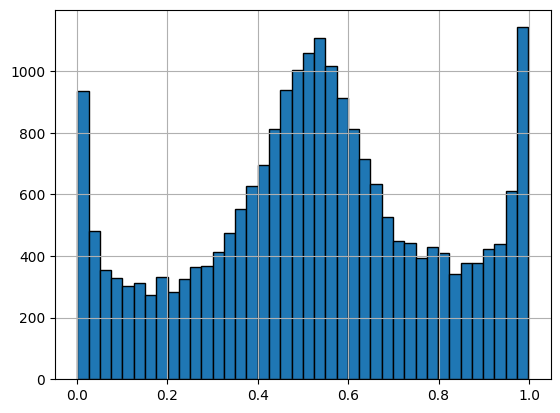

In [2]:
m.hist(bins=40,edgecolor="black")

<AxesSubplot:>

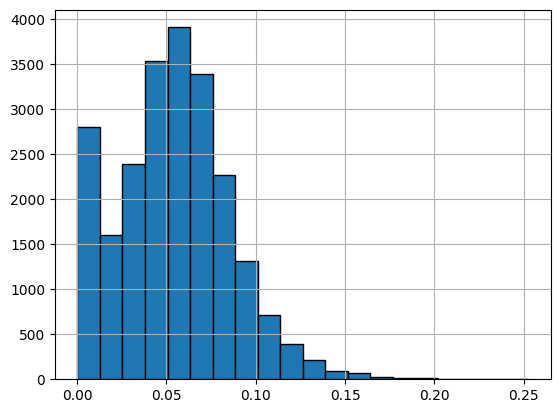

In [7]:
std.hist(bins=20,edgecolor="black")

In [8]:
from Classe_sismogramma_v3 import ClasseDataset
hdf1 = "/home/silvia/Desktop/Data/DETECT/Detect_data_picked_normalized_downsampled.hdf5"
csv1 = "/home/silvia/Desktop/Data/DETECT/Detect_metadata_picked_normalized_downsampled.csv"

D = ClasseDataset()
D.leggi_custom_dataset(hdf1,csv1)
D.metadata.keys()

dict_keys(['trace_name', 'source_latitude_deg', 'source_longitude_deg', 'source_depth', 'source_origin_time', 'station_code', 'station_channels', 'trace_start_time', 'trace_P_arrival_sample', 'source_magnitude', 'source_magnitude_type', 'sampling_rate', 'centrato', 'demeaned', 'normalized', 'source_id', 'Pick_quality', 'Pred_more_16'])

In [26]:
D.plotta(list(m[(m<=0.2)& (m>0.18)].index),120, "Detect_0,18_0,20","/home/silvia/Desktop/Immagini/Detect_downsampledscipy_0,18_0,20")

<Figure size 640x480 with 0 Axes>

In [27]:
m[(m<=0.9)& (m>=0.85)]

11       0.879244
17       0.881563
93       0.869579
129      0.885056
143      0.856936
           ...   
22597    0.892891
22627    0.862473
22660    0.892484
22750    0.899859
22756    0.879166
Length: 750, dtype: float64

# Insert in Sac traces the metadata:
(Quality_pick, SNR, pred1, pred2, predmean)

In [37]:
# FIXME USE ka key to inset polarity
"""import obspy 
b = obspy.read("/home/silvia/Desktop/Data/Waveforms_Pollino_buone/20100130012400_M2.5/*.sac")
b[5].stats.sac["ka"]"""

import pandas as pd
import os
import obspy
aia = pd.read_csv("/home/silvia/Desktop/Data/DETECT/Detect_Pick_SNR_Predictions16.csv")
Tr1_pat = "/home/silvia/Desktop/Data/DETECT/Tr_1_picked_Z/"
Tr2_pat = "/home/silvia/Desktop/Data/DETECT/Tr_2_picked_Z/"
Trm_pat = "/home/silvia/Desktop/Data/DETECT/Tr_picked_Z_SNR,qual,predictions/"
Tr1_f = os.listdir(Tr1_pat)
Tr2_f = os.listdir(Tr2_pat)


for i in range(len(aia["trace_name"])):
    name = aia["trace_name"][i]
    if f"{name}.sac" in Tr1_f:
        b = obspy.read(f"{Tr1_pat}{name}.sac")
    else:
        b = obspy.read(f"{Tr2_pat}{name}.sac")
        
    b[0].stats.sac.user0 = aia["Pick_quality"][i]
    b[0].stats.sac.user1 = aia["trace_Z_snr_db"][i]
    b[0].stats.sac.user2 = aia["pred_downsampled_1"][i]
    b[0].stats.sac.user3 = aia["pred_downsampled_2"][i]
    b[0].stats.sac.user4 = aia["pred_downsampled_mean"][i]
        
    b.write(f"{Trm_pat}{name}.sac", format="SAC")

In [35]:
aa = obspy.read("/home/silvia/Desktop/Data/DETECT/Tr_picked_Z_SNR,qual,predictions/210925092812.S0715.DHZ.sac")
aa[0].stats.sac.user0

# Calc interstazione
cos a = cos b cos c + sin b sin c cos A (a,b,c sono gli archi del triangolo sferico, A l'angolo sferico opposto ad a) <br>
Nel nostro caso A è 90°, quindi il seno è nullo <br>
Mentre b è la differenza delle longitudini e c la differenza delle latitudini delle 2 stazioni <br> <br>
RT = 6373

In [1]:
import pandas as pd
import numpy as np
sta = pd.read_csv("/home/silvia/Desktop/Data/DETECT/staz_lat_lon_pick.csv")
s = list(sta.keys())
s.sort()
dists = np.zeros((len(s),len(s)))

sta["S0112"]

for i in range(len(s)):
    for j in range(len(s)):
        lat1 = sta[s[i]][0]
        lon1 = sta[s[i]][1]
        lat2 = sta[s[j]][0]
        lon2 = sta[s[j]][1]
        dists[i][j] = np.arccos(np.cos(np.deg2rad(lat1 - lat2)) * np.cos(np.deg2rad(lon1 - lon2)))
dists_pd = pd.DataFrame(dists, columns=s)
dists_pd.index = s
dists_pd.to_csv("/home/silvia/Desktop/Data/DETECT/Distanze_interstazione_picked_rad.csv")

# Analisi statistiche (lat,lon,num_pick,dist...)
e istogrammi

In [ ]:
# statistiche distanze interstazione TUTTE stazioni
import numpy as np
import pandas as pd
RT = 6373 # Km
si = pd.read_csv("/home/silvia/Desktop/Data/DETECT/Distanze_interstazione_picked_rad.csv").set_index("Unnamed: 0")  # pd_datf distanze angolari tra strazioni
si = si * 6373 
station_names = list(si.keys())
dists_all = []

for i in range(183):
    for j in range(i+1,183):
        dists_all.append(si[station_names[i]][station_names[j]])


min_dist_all=(np.min(dists_all))
max_dist_all=(np.max(dists_all))
mea_dist_all=(np.mean(dists_all))
med_dist_all=(np.median(dists_all))
std_dist_all=(np.std(dists_all))

f = open("/home/silvia/Desktop/Data/DETECT/interstazione_all_statistihe.txt", "w")
f.write(f"min, max, mean, med, std\n{min_dist_all},{max_dist_all},{mea_dist_all},{med_dist_all},{std_dist_all}")
f.close()

In [5]:
# lat e longitude
import pandas as pd
import obspy
import os
import gc
import numpy as np
a = pd.read_csv("/home/silvia/Desktop/Data/DETECT/Events_picked_Metadata.csv")
tr1 = "/home/silvia/Desktop/Data/DETECT/Tr_1_picked_Z/"
tr2 = "/home/silvia/Desktop/Data/DETECT/Tr_2_picked_Z/"

tr1l = os.listdir(tr1)
tr2l = os.listdir(tr2)

for i in range(len(tr1l)):
    tr1l[i] = tr1l[i][0:12]
for i in range(len(tr2l)):
    tr2l[i] = tr2l[i][0:12]

mea_lat = []
min_lat = []
max_lat = []
med_lat = []
std_lat = []

mea_lon = []
min_lon = []
max_lon = []
med_lon = []
std_lon = []

for j in range(len(a["source_id"])):
    lats = []
    lons = []
    gc.collect()
    name = str(a["source_id"][j])
    
    if name in tr1l:
        b = obspy.read(f"{tr1}{name}*")
    else:
        b = obspy.read(f"{tr2}{name}*")

    for i in range(len(b)):
        lats.append(b[i].stats.sac["stla"])
        lons.append(b[i].stats.sac["stlo"])
    
    mea_lat.append(np.mean(lats))
    min_lat.append(np.min(lats))
    max_lat.append(np.max(lats))
    med_lat.append(np.median(lats))
    std_lat.append(np.std(lats))

    mea_lon.append(np.mean(lons))
    min_lon.append(np.min(lons))
    max_lon.append(np.max(lons))
    med_lon.append(np.median(lons))
    std_lon.append(np.std(lons))

a["mean_lat_stat_pick"] = mea_lat
a["min_lat_stat_pick"] = min_lat
a["max_lat_stat_pick"] = max_lat
a["median_lat_stat_pick"] = med_lat
a["std_lat_stat_pick"] = std_lat

a["mean_lon_stat_pick"] = mea_lon
a["min_lon_stat_pick"] = min_lon
a["max_lon_stat_pick"] = max_lon
a["median_lon_stat_pick"] = med_lon
a["std_lon_stat_pick"] = std_lon

a.to_csv("/home/silvia/Desktop/Data/DETECT/Events_picked_Metadata_new.csv", index=False)

In [5]:
# interstation distances
import pandas as pd
import obspy
import os
import gc
import numpy as np
a = pd.read_csv("/home/silvia/Desktop/Data/DETECT/Events_picked_Metadata.csv")
tr1 = "/home/silvia/Desktop/Data/DETECT/Tr_1_picked_Z/"
tr2 = "/home/silvia/Desktop/Data/DETECT/Tr_2_picked_Z/"
tr1l = os.listdir(tr1)
tr2l = os.listdir(tr2)
for i in range(len(tr1l)):
    tr1l[i] = tr1l[i][0:12]
for i in range(len(tr2l)):
    tr2l[i] = tr2l[i][0:12]

RT = 6373 # Km
si = pd.read_csv("/home/silvia/Desktop/Data/DETECT/Distanze_interstazione_picked_rad.csv").set_index("Unnamed: 0")  # pd_datf distanze angolari tra strazioni
si = si * 6373 

min_dist = []
max_dist = []
mea_dist = []
med_dist = []
std_dist = []

for j in range(len(a["source_id"])):
    stations = []
    dist_si_sk = []
    gc.collect()
    name = str(a["source_id"][j])
    
    if name in tr1l:
        b = obspy.read(f"{tr1}{name}*")
    else:
        b = obspy.read(f"{tr2}{name}*")
    
    for i in range(len(b)):
        stations.append(b[i].stats.station)

    for i in stations:
        for k in stations:
            if i != k:
                dist_si_sk.append(si[i][k])
                
    if len(b) == 1:
        dist_si_sk.append(0)
    
    min_dist.append(np.min(dist_si_sk))
    max_dist.append(np.max(dist_si_sk))
    mea_dist.append(np.mean(dist_si_sk))
    med_dist.append(np.median(dist_si_sk))
    std_dist.append(np.std(dist_si_sk))

a["mean_dist_stat_pick"] = mea_dist 
a["min_dist_stat_pick"] = min_dist
a["max_dist_stat_pick"] = max_dist
a["median_dist_stat_pick"] = med_dist
a["std_dist_stat_pick"] = std_dist


a.to_csv("/home/silvia/Desktop/Data/DETECT/Events_picked_Metadata_new.csv", index=False)

,mean_lat_stat_pick,max_lat_stat_pick,min_lat_stat_pick,median_lat_stat_pick,std_lat_stat_pick,mean_lon_stat_pick,max_lon_stat_pick,min_lon_stat_pick,median_lon_stat_pick,std_lon_stat_pick,mean_dist_stat_pick,min_dist_stat_pick,max_dist_stat_pick,median_dist_stat_pick,std_dist_stat_pick
0,40.651684,40.71896,40.591328,40.657516,0.03135,15.426517,15.514897,15.383242,15.423156,0.034485,6.312053,0.192636,20.395723,5.360256,4.390587


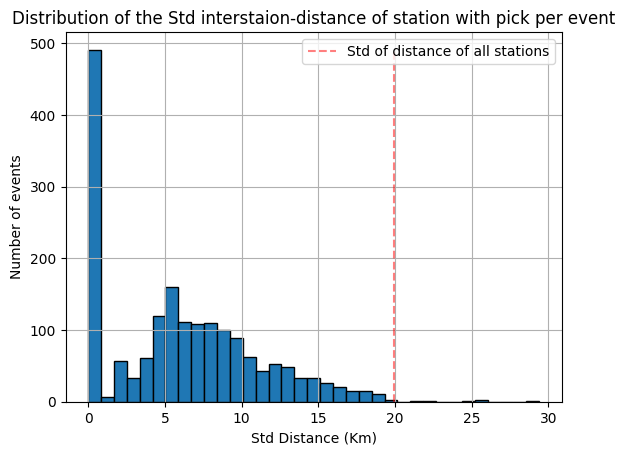

In [62]:
# histogrammi vari
import pandas as pd
import matplotlib.pyplot as plt
a = pd.read_csv("/home/silvia/Desktop/Data/DETECT/Events_picked_Metadata.csv")
f = pd.read_csv("/home/silvia/Desktop/Data/DETECT/interstazione_all_statistihe.txt")

n, bins, patches = plt.hist(a["std_dist_stat_pick"], bins=35,edgecolor="black")
ymin = min(n)
ymax = max(n)
plt.vlines(f["std"], ymin, ymax, color="red", linestyles="--", alpha=0.5, label="Std of distance of all stations")
plt.title("Distribution of the Std interstaion-distance of station with pick per event")
plt.grid()
plt.xlabel("Std Distance (Km)")
plt.ylabel("Number of events")
plt.savefig("/home/silvia/Desktop/Immagini/_Detect_station_picked_std_distance.png",dpi=200)
plt.legend()
a.iloc[0:1,6:]

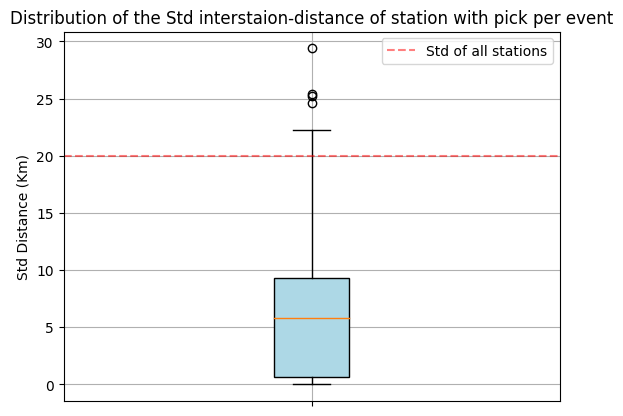

In [63]:
boxplt = plt.boxplot(a["std_dist_stat_pick"],  showfliers=True, patch_artist=True, labels=[""])
plt.hlines(f["std"], 0.5, 1.5, color="red", linestyles="--", alpha=0.5, label="Std of all stations")
plt.title("Distribution of the Std interstaion-distance of station with pick per event")
plt.ylabel("Std Distance (Km)")
plt.grid()
plt.legend()
color = "lightblue"
for patch in boxplt['boxes']:
    patch.set_facecolor(color)
plt.savefig("/home/silvia/Desktop/Immagini/_Detect_station_picked_std_distance_BoxPlot.png",dpi=200)

In [61]:
f

,min,max,mean,med,std
0,0.050447,91.116232,32.049425,28.188617,19.962819


## Polarità

In [11]:
import pandas as pd
import numpy as np
catalog = pd.read_csv("/home/silvia/Desktop/Data/DETECT/Events_picked_Metadata.csv")
stats = pd.read_csv("/home/silvia/Desktop/Data/DETECT/staz_lat_lon_pick.csv")
metadata = pd.read_csv("/home/silvia/Desktop/Data/DETECT/Detect_metadata_picked_normalized_downsampled.csv")
si = pd.read_csv("/home/silvia/Desktop/Data/DETECT/Distanze_interstazione_picked_rad.csv").set_index("Unnamed: 0")  # pd_datf distanze angolari tra strazioni
RT = 6373 # Km
si = si * 6373 

th_up = 0.9
th_down = 0.1

Npol_up = []
Npol_down = []

min_dist = []
max_dist = []
mea_dist = []
med_dist = []
std_dist = []

mea_lat = []
min_lat = []
max_lat = []
med_lat = []
std_lat = []

mea_lon = []
min_lon = []
max_lon = []
med_lon = []
std_lon = []


for name in catalog["source_id"][0:1]:
    tmp = metadata[metadata["source_id"]==name]
    tmp_pol = tmp[(tmp["Pred_more_16"]>=th_up) | (tmp["Pred_more_16"]<=th_down)]

    Npol_up.append(len(tmp[tmp["Pred_more_16"]>=th_up]))
    Npol_down.append(len(tmp[tmp["Pred_more_16"]<=th_down]))    

    lat_pol = stats[tmp_pol["station_code"]].iloc[0].values
    lon_pol = stats[tmp_pol["station_code"]].iloc[1].values

    min_lat.append(np.min(lat_pol))
    max_lat.append(np.max(lat_pol))
    mea_lat.append(np.mean(lat_pol))
    med_lat.append(np.median(lat_pol))
    std_lat.append(np.std(lat_pol))

    min_lon.append(np.min(lon_pol))
    max_lon.append(np.max(lon_pol))
    mea_lon.append(np.mean(lon_pol))
    med_lon.append(np.median(lon_pol))
    std_lon.append(np.std(lon_pol))

    for i in range(len(tmp_pol)):
        stations.append(tmp_pol["station_code"][i])

    for i in stations:
        for k in stations:
            if i != k:
                dist_si_sk.append(si[i][k])
                
    if len(dist_si_sk) == 0:
        dist_si_sk.append(0)
    
    min_dist.append(np.min(dist_si_sk))
    max_dist.append(np.max(dist_si_sk))
    mea_dist.append(np.mean(dist_si_sk))
    med_dist.append(np.median(dist_si_sk))
    std_dist.append(np.std(dist_si_sk))
    

catalog["number_polarities_up"] = Npol_up
catalog["number_polarities_down"] = Npol_down

catalog["min_dist_stat_polarity"] = min_dist
catalog["max_dist_stat_polarity"] = max_dist
catalog["mean_dist_stat_polarity"] = mea_dist 
catalog["median_dist_stat_polarity"] = med_dist
catalog["std_dist_stat_polarity"] = std_dist

catalog["min_lat_stat_polarity"] = min_lat
catalog["max_lat_stat_polarity"] = max_lat
catalog["mean_lat_stat_polarity"] = mea_lat
catalog["median_lat_stat_polarity"] = med_lat
catalog["std_lat_stat_polarity"] = std_lat

catalog["min_lon_stat_polarity"] = min_lon
catalog["mean_lon_stat_polarity"] = mea_lon
catalog["max_lon_stat_polarity"] = max_lon
catalog["median_lon_stat_polarity"] = med_lon
catalog["std_lon_stat_polarity"] = std_lon

catalog.to_csv("/home/silvia/Desktop/Data/DETECT/Events_picked_Metadata_new.csv", index=False)

In [39]:
th_up = 0.9
th_down = 0.1    
tmp = metadata[metadata["source_id"]==name]
tmp_pol = tmp[(tmp["Pred_more_16"]>=th_up) | (tmp["Pred_more_16"]<=th_down)]
tmp_pol

,trace_name,source_latitude_deg,source_longitude_deg,source_depth,source_origin_time,station_code,station_channels,trace_start_time,trace_P_arrival_sample,source_magnitude,source_magnitude_type,sampling_rate,centrato,demeaned,normalized,source_id,Pick_quality,Pred_more_16
5,210901012118.S0413.DHZ,40.657,15.4242,5.0,2021-09-01 01:21:18,S0413,DHZ,2021-09-01T01:20:48.000000Z,6473,-0.98,ML,200.0,True,rumore,Soglia=20.0_traccia_di_400_samples,210901012118,0,0.037114
7,210901012118.S0813.DHZ,40.657,15.4242,5.0,2021-09-01 01:21:18,S0813,DHZ,2021-09-01T01:20:48.000000Z,6483,-0.98,ML,200.0,True,rumore,Soglia=20.0_traccia_di_400_samples,210901012118,0,0.031783
10,210901012118.S1013.DHZ,40.657,15.4242,5.0,2021-09-01 01:21:18,S1013,DHZ,2021-09-01T01:20:48.000000Z,6451,-0.98,ML,200.0,True,rumore,Soglia=20.0_traccia_di_400_samples,210901012118,0,0.992035


In [46]:
catalog

,source_id,source_latitude_deg,source_longitude_deg,source_depth,source_magnitude,number_P_picks,mean_lat_stat_pick,max_lat_stat_pick,min_lat_stat_pick,median_lat_stat_pick,...,mean_lon_stat_pick,max_lon_stat_pick,min_lon_stat_pick,median_lon_stat_pick,std_lon_stat_pick,mean_dist_stat_pick,min_dist_stat_pick,max_dist_stat_pick,median_dist_stat_pick,std_dist_stat_pick
0,210901012118,40.6570,15.4242,5.0,-0.98,11,40.651684,40.718960,40.591328,40.657516,...,15.426517,15.514897,15.383242,15.423156,0.034485,6.312053,0.192636,20.395723,5.360256,4.390587
1,210901020904,40.7138,15.3785,2.2,-0.20,7,40.716070,40.727383,40.666890,40.722670,...,15.375623,15.415278,15.360578,15.368283,0.017647,3.211192,0.148534,9.051094,1.638047,3.237624
2,210901034256,40.7094,15.4020,8.5,0.31,19,40.687595,40.790005,40.628223,40.670025,...,15.386743,15.442941,15.282280,15.380209,0.038585,8.143380,0.148534,25.061352,8.626276,5.236200
3,210901034316,40.7180,15.3870,7.3,-0.68,14,40.691986,40.731174,40.633350,40.694492,...,15.398244,15.442941,15.360578,15.399260,0.029407,5.995262,0.067358,13.641944,7.210460,4.228702
4,210901044505,40.7445,15.3919,-1.7,-1.06,7,40.724087,40.731174,40.718960,40.722670,...,15.372756,15.383242,15.360673,15.372554,0.007474,1.297978,0.292441,2.623200,1.333910,0.610200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,220227152916,40.6064,15.5624,-0.9,-0.78,1,40.565980,40.565980,40.565980,40.565980,...,15.555710,15.555710,15.555710,15.555710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1810,220227181010,40.7898,15.3602,11.2,0.23,12,40.753204,40.820805,40.633410,40.786568,...,15.323339,15.432440,15.095772,15.333536,0.084895,15.202360,0.321289,37.522959,13.007443,8.452497
1811,220228082620,40.4855,15.6001,7.4,0.30,10,40.517480,40.571780,40.479690,40.490932,...,15.631500,15.680530,15.548822,15.663038,0.054496,8.751179,0.306950,17.299965,8.671005,6.793354
1812,220228163700,40.5904,15.5486,8.8,0.98,18,40.596880,40.790005,40.479690,40.568424,...,15.525611,15.687070,15.273820,15.554471,0.132080,20.393712,0.181037,55.721060,16.425743,14.358487


# Mappa polarità evento per evento

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
from Classe_sismogramma_v3 import ClasseDataset
from matplotlib.colors import LinearSegmentedColormap

def generate_colormap_b_g_y(estremi):
    """
    Estremi deve essere un vettore di 4 interi tra 1 e 99 ordinati crescente.
    """
    blu = "#0044D3"
    grigio = "#B0A9A7"
    giallo = "#FBE723"

    vio_gri = LinearSegmentedColormap.from_list( "a", [blu,grigio])
    gri_gia = LinearSegmentedColormap.from_list( "b", [grigio,giallo])

    lista_colori = []

    for i in range(100):
        if i < estremi[0]:
            lista_colori.append(blu)

        if estremi[0] < i < estremi[1]:
            lista_colori.append(vio_gri((i-estremi[0])/(estremi[1]-estremi[0])))

        if estremi[1] <= i < estremi[2]:
            lista_colori.append(grigio)

        if estremi[2] <= i < estremi[3]:
            lista_colori.append(gri_gia((i-estremi[2])/(estremi[3]-estremi[2])))

        if estremi[3] <= i:
            lista_colori.append(giallo)
            
    c1 = LinearSegmentedColormap.from_list( "f", lista_colori)
    return c1


img_pat = "/home/silvia/Desktop/Immagini/Detect_events_polarity_more_16"
L = "Pol_GE_10"
M = "Pol_G_5_L_10"
S = "Pol_LE_5"

catalog = pd.read_csv("/home/silvia/Desktop/Data/DETECT/Events_picked_Metadata_ori.csv")
stats = pd.read_csv("/home/silvia/Desktop/Data/DETECT/staz_lat_lon_pick.csv")

h5 = "/home/silvia/Desktop/Data/DETECT/Detect_data_picked_normalized_downsampled.hdf5"
cs = "/home/silvia/Desktop/Data/DETECT/Detect_metadata_picked_normalized_downsampled.csv"
D = ClasseDataset()
D.leggi_custom_dataset(h5,cs)

meta = pd.DataFrame.from_dict(D.metadata)
events = list(set(list(meta["source_id"])))

estrem = [10, 20, 80, 90]
my_colormap =  generate_colormap_b_g_y(estrem)

iii = 30
for ev in events:
    tmp = meta[meta["source_id"]==ev]
    lat_pol = stats[tmp["station_code"]].iloc[0].values
    lon_pol = stats[tmp["station_code"]].iloc[1].values
    num_pol = len(tmp[tmp["Pred_more_16"]>= 0.9]) + len(tmp[tmp["Pred_more_16"]<= 0.1])
    plt.scatter(stats.iloc[1].values,stats.iloc[0].values, color = "#ff7f0e", label="All_stations")
    plt.scatter(tmp["source_longitude_deg"].iloc[0],tmp["source_latitude_deg"].iloc[0], s=20, label="Event")
    plt.scatter(lon_pol,lat_pol, s=3, c=tmp["Pred_more_16"].values, cmap=my_colormap, vmin=0, vmax=1, label="Picked_stations")
    cio_bar = plt.colorbar(label="Predicted polarity")
    cio_bar.set_label("Predicted polarity", rotation=270, labelpad=30)
    plt.title(f"Event_{tmp['source_id'].iloc[0]}_M_{tmp['source_magnitude'].iloc[0]}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    if num_pol <= 5:
        plt.savefig(f"{img_pat}/{S}/{tmp['source_id'].iloc[0]}_M_{tmp['source_magnitude'].iloc[0]}.png", dpi=300)
    if 5 < num_pol < 10:
        plt.savefig(f"{img_pat}/{M}/{tmp['source_id'].iloc[0]}_M_{tmp['source_magnitude'].iloc[0]}.png", dpi=300)
    if num_pol >= 10:
        plt.savefig(f"{img_pat}/{L}/{tmp['source_id'].iloc[0]}_M_{tmp['source_magnitude'].iloc[0]}.png", dpi=300)
    plt.clf()


<Figure size 640x480 with 0 Axes>

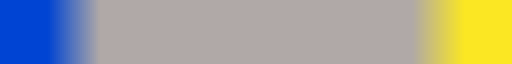

In [30]:
estremi = [10, 20, 80, 90]

# viola = "#450559"
# grigio = "#B0A9A7"
# giallo = "#FBE723"

blu = "#0044D3"
grigio = "#B0A9A7"
giallo = "#FBE723"

vio_gri = LinearSegmentedColormap.from_list( "a", [blu,grigio])
gri_gia = LinearSegmentedColormap.from_list( "b", [grigio,giallo])

lista_colori = []

for i in range(100):
    if i < estremi[0]:
        lista_colori.append(blu)

    if estremi[0] < i < estremi[1]:
        lista_colori.append(vio_gri((i-estremi[0])/(estremi[1]-estremi[0])))

    if estremi[1] <= i < estremi[2]:
        lista_colori.append(grigio)

    if estremi[2] <= i < estremi[3]:
        lista_colori.append(gri_gia((i-estremi[2])/(estremi[3]-estremi[2])))

    if estremi[3] <= i:
        lista_colori.append(giallo)
        
c1 = LinearSegmentedColormap.from_list( "f", lista_colori)
c1

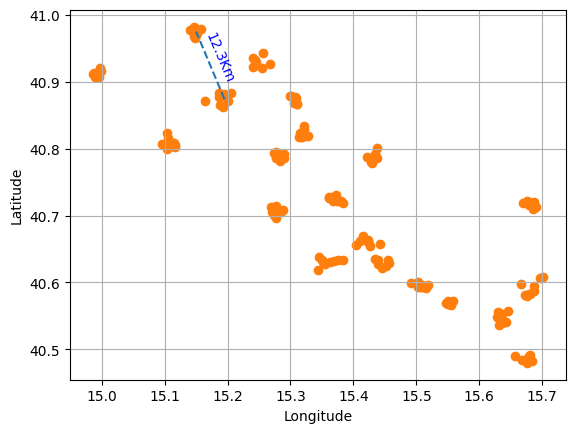

In [54]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

"""dists[i][j] = np.arccos(np.cos(np.deg2rad(lat1 - lat2)) * np.cos(np.deg2rad(lon1 - lon2)))"""

stats = pd.read_csv("/home/silvia/Desktop/Data/DETECT/staz_lat_lon_pick.csv")
plt.scatter(stats.iloc[1].values,stats.iloc[0].values, color = "#ff7f0e", label="All_stations")
lon1, lat1 = 15.195, 40.874
lon2, lat2 = 15.15, 40.975

dis = round(np.arccos(np.cos(np.deg2rad(lat1 - lat2)) * np.cos(np.deg2rad(lon1 - lon2)))*6373,1)

plt.plot([15.195,15.15], [40.874,40.975], linestyle="--")
plt.grid()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.text(15.16,40.9,f"{dis}Km", color="blue",rotation=-67)
plt.savefig("/home/silvia/Desktop/Immagini/_Distanza_tipo_interstazione.png",dpi=100)

# HOS 

In [ ]:
import _Library_HOS
from Classe_sismogramma_v3 import ClasseDataset
import pandas as pd

# ATTENTO prima di usate get_onset, 1) Fallo su quelle a 200 HZ
                                #   2) PRIMA devi fare filtro passa alto (sui 3-5 Hz)
# parametri di metodo HOS DA OTTIMIZZARE "SUL POLLINO" (però siamo a 100 HZ!!!! poi fai anche test su quelle già picked di DETECT?)
# Scrivi il codice che usi in un unico file e condividi!

hd = "/home/silvia/Desktop/Data/DETECT/data_Tr1+Tr2_picked.hdf5"
cs = "/home/silvia/Desktop/Data/DETECT/Detect_metadata_picked_normalized_downsampled.csv"

D = ClasseDataset()
D.leggi_custom_dataset(hd,cs)
D.demean()

# sig = _Library_HOS.freq_filter(D.sismogramma[7], 200, 5, type_filter= "highpass")
# onset_1, diff, onset_2 = _Library_HOS.get_onset(sig, 40, threshold=0.1, statistics= _Library_HOS.S_6)
# print(onset_1, onset_2)


In [ ]:
import _Library_HOS
sig = _Library_HOS.freq_filter(D.sismogramma[7], 200, 5, type_filter= "highpass")
onset_1, diff, onset_2 = _Library_HOS.get_onset(sig, 40, threshold=0.1, statistics= _Library_HOS.S_6)
print(onset_1, onset_2)